### Load data

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target)
target.name = 'target'
df = pd.concat([data, target], axis=1)
df['target'] = df['target'].map(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Initialize a TableMage object

In [2]:
import tablemage as tm
analyzer = tm.Analyzer(df, test_size=0.2, name='Iris scikit-learn dataset')
analyzer

UPDT: Renamed variables 'petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 
      'sepal width (cm)' to 'petal_length_(cm)', 'petal_width_(cm)', 
      'sepal_length_(cm)', 'sepal_width_(cm)'. 
UPDT: Analyzer initialized for dataset 'Iris scikit-learn dataset'. 


Iris scikit-learn dataset 
----------------------------------------------------------------------------------------
Train shape: (120, 5)                        Test shape: (30, 5)                        
----------------------------------------------------------------------------------------
Categorical variables:
  'target' 
                                                                                        
Numeric variables:
  'petal_length_(cm)', 'petal_width_(cm)', 'sepal_length_(cm)', 'sepal_width_(cm)' 

In [3]:
analyzer.eda().numeric_stats()

Statistic,min,max,mean,std,variance,skew,kurtosis,q1,median,q3,n_missing,missing_rate,n
Variable,,,,,,,,,,,,,
petal_length_(cm),1.0,6.9,3.758,1.765,3.116,-0.272,-1.396,1.6,4.35,5.1,0,0.0,150
petal_width_(cm),0.1,2.5,1.199,0.762,0.581,-0.102,-1.336,0.3,1.30,1.8,0,0.0,150
sepal_length_(cm),4.3,7.9,5.843,0.828,0.686,0.312,-0.574,5.1,5.80,6.4,0,0.0,150
sepal_width_(cm),2.0,4.4,3.057,0.436,0.190,0.316,0.181,2.8,3.00,3.3,0,0.0,150


In [4]:
output = analyzer.logit(
    target='target',
    predictors=['petal_length_(cm)', 'petal_width_(cm)', 'sepal_length_(cm)', 'sepal_width_(cm)'],
    alpha=0.1
)
output.step("forward")
# output.step().metrics("both")

Logistic Regression Report
----------------------------------------------------------------------------------------
Target variable:
  'target' 
                                                                                        
Predictor variables:
  'petal_length_(cm)', 'sepal_length_(cm)', 'petal_width_(cm)', 'sepal_width_(cm)' 
----------------------------------------------------------------------------------------
Metrics:
  Train                                      Test 
    F1:  0.975                                 F1:  1.0 
    Acc: 0.975                                 Acc: 1.0 

In [5]:
report = analyzer.classify(
    models=[
        tm.ml.LinearC(),
        tm.ml.LinearC(threshold_strategy=None, name="LinearC (no threshold)"),
        tm.ml.SVMC("rbf")
    ],
    target='target'
)

UPDT: Fitting model 'LinearC(l2)'. 
PROG: Fitting 'LinearC(l2)'. Search method: OptunaSearchCV (100 trials, 500 total fits). 
       
PROG: Optimal thresholds set for 'LinearC(l2)' via roc. 
UPDT: Successfully fitted model 'LinearC(l2)'. 
UPDT: Fitting model 'LinearC (no threshold)'. 
PROG: Fitting 'LinearC (no threshold)'. Search method: OptunaSearchCV (100 trials, 500 
      total fits).  
UPDT: Successfully fitted model 'LinearC (no threshold)'. 
UPDT: Fitting model 'SVMC(rbf)'. 
PROG: Fitting 'SVMC(rbf)'. Search method: OptunaSearchCV (100 trials, 500 total fits).  
PROG: Optimal thresholds set for 'SVMC(rbf)' via roc. 
UPDT: Successfully fitted model 'SVMC(rbf)'. 


In [6]:
report.metrics("both")

LinearC(l2)  LinearC (no threshold)  SVMC(rbf)
Dataset Statistic                                                   
train   accuracy            0.983                   0.983      0.983
        f1                  0.983                   0.983      0.983
        precision           0.984                   0.983      0.984
        recall              0.984                   0.983      0.984
        roc_auc(ovo)        0.999                   0.999      0.999
        n_obs             120.000                 120.000    120.000
test    accuracy            1.000                   1.000      1.000
        f1                  1.000                   1.000      1.000
        precision           1.000                   1.000      1.000
        recall              1.000                   1.000      1.000
        roc_auc(ovo)        1.000                   1.000      1.000
        n_obs              30.000                  30.000     30.000

### Conduct exploratory analysis

Visualize the distribution of petallength(cm) stratified by the target

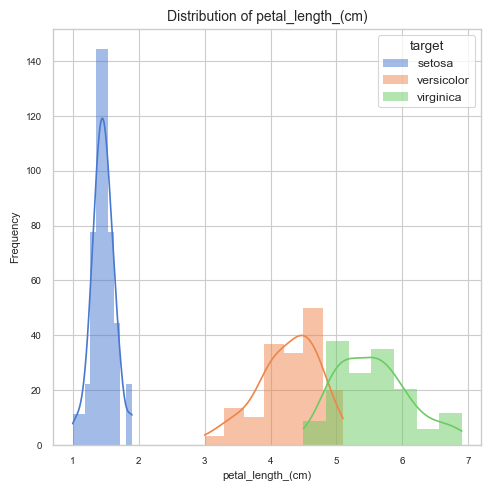

In [7]:
analyzer.eda(dataset='all').plot_distribution_stratified(
    'petal_length_(cm)', 'target', strategy='stacked_hist_kde_frequency')

Visualize the distribution of all continuous variables

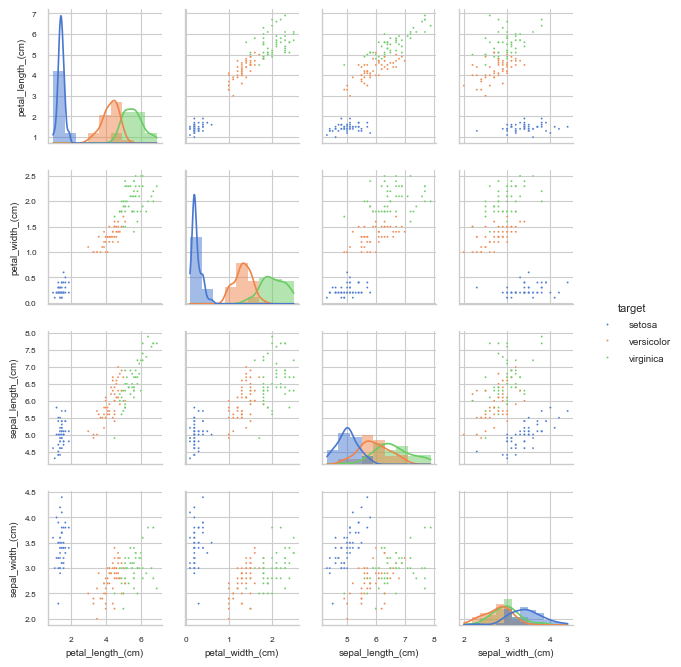

In [8]:
analyzer.eda(dataset='all').plot_numeric_pairs(
    numeric_vars=analyzer.datahandler().numeric_vars(),
    stratify_by='target',
)

Visualize PCA stratified by the target label

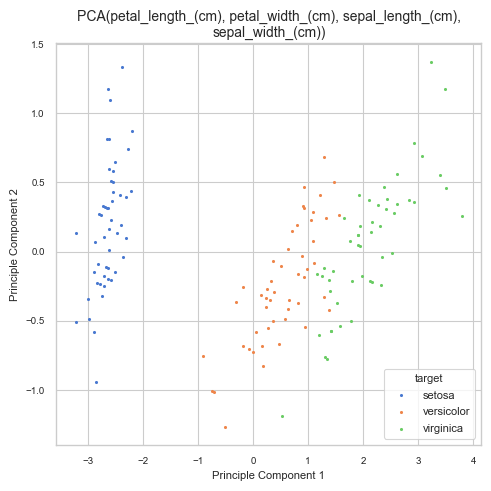

In [9]:
analyzer.eda(dataset='all').plot_pca(
    numeric_vars=analyzer.datahandler().numeric_vars(), 
    stratify_by='target'
)

UPDT: Fitting model 'KMeansClust(3)'. 
PROG: Identified 3 optimal clusters for 'KMeansClust(3)' via silhouette. 
UPDT: Successfully fitted model 'KMeansClust(3)'. 


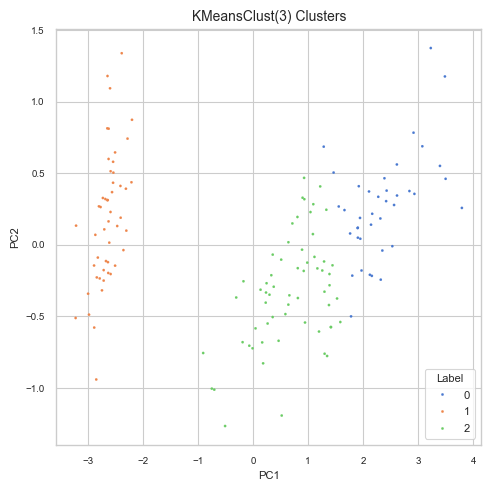

In [10]:
analyzer.cluster(
    models=[
        tm.ml.KMeansClust(k=3)
    ],
    features=['petal_length_(cm)', 'petal_width_(cm)', 'sepal_length_(cm)', 'sepal_width_(cm)'],
).plot_clusters("KMeansClust(3)")

### Machine learning classification benchmarking

In [7]:
report = analyzer.classify(
    models=[
        tm.ml.LinearC(type='no_penalty'),
        tm.ml.LinearC(type='l2'),
        tm.ml.TreesC(type='random_forest'),
    ], 
    target='target',
    outer_cv=2
)

INFO: Evaluating model 'LinearC(no_penalty)'. 
PROG: Fitting 'LinearC(no_penalty)'. Search method: GridSearchCV (1 fits per fold, 5 
      total fits).  
PROG: Fitting 'LinearC(no_penalty)'. Search method: GridSearchCV (1 fits per fold, 5 
      total fits).  
PROG: Fitting 'LinearC(no_penalty)'. Search method: GridSearchCV (1 fits per fold, 5 
      total fits).  
INFO: Successfully evaluated model 'LinearC(no_penalty)'. 
INFO: Evaluating model 'LinearC(l2)'. 
PROG: Fitting 'LinearC(l2)'. Search method: OptunaSearchCV (100 trials, 500 total fits). 
       
PROG: Fitting 'LinearC(l2)'. Search method: OptunaSearchCV (100 trials, 500 total fits). 
       
PROG: Fitting 'LinearC(l2)'. Search method: OptunaSearchCV (100 trials, 500 total fits). 
       
INFO: Successfully evaluated model 'LinearC(l2)'. 
INFO: Evaluating model 'TreesC(random_forest)'. 
PROG: Fitting 'TreesC(random_forest)'. Search method: OptunaSearchCV (100 trials, 500 
      total fits).  
PROG: Fitting 'TreesC(random_for

In [8]:
report

ML Classification Report
----------------------------------------------------------------------------------------
Target variable:
  'target' 
                                                                                        
Predictor variables:
  'sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)' 
                                                                                        
Models evaluated:
  'LinearC(no_penalty)', 'LinearC(l2)', 'TreesC(random_forest)' 
                                                                                        
Feature selectors:
  None 
----------------------------------------------------------------------------------------
Best models:
  1. 'LinearC(no_penalty)'                   Test F1: 1.0 
  2. 'LinearC(l2)'                           Test F1: 1.0 
  3. 'TreesC(random_forest)'                 Test F1: 1.0 

View fit statistics for each fold

In [15]:
report.cv_metrics()

,LinearC(no_penalty),LinearC(l2),TreeEnsembleC(adaboost)
Statistic,,,
accuracy,0.958333,0.95,0.941667
f1,0.958318,0.949969,0.941651
precision,0.959482,0.950355,0.941667
recall,0.959127,0.950355,0.942022
roc_auc(ovo),NaN,NaN,NaN
n_obs,60.0,60.0,60.0


In [17]:
report.metrics('test')

,LinearC(no_penalty),LinearC(l2),TreeEnsembleC(adaboost)
Statistic,,,
accuracy,1.0,1.0,1.0
f1,1.0,1.0,1.0
precision,1.0,1.0,1.0
recall,1.0,1.0,1.0
roc_auc(ovo),1.0,1.0,1.0
n_obs,30,30,30


In [19]:
report.cv_metrics_by_class(True)

LinearC(no_penalty) LinearC(l2) TreeEnsembleC(adaboost)
Class      Statistic                                                        
setosa     accuracy             0.958333        0.95                0.941667
           f1                        1.0         1.0                     1.0
           n_obs                    60.0        60.0                    60.0
           precision                 1.0         1.0                     1.0
           recall                    1.0         1.0                     1.0
versicolor accuracy             0.958333        0.95                0.941667
           f1                   0.938415    0.926829                0.913415
           n_obs                    60.0        60.0                    60.0
           precision            0.952381    0.927381                   0.925
           recall               0.927381    0.927381                0.902381
virginica  accuracy             0.958333        0.95                0.941667
           f1                   0.936538    0.923077                0.911538
           n_obs                    60.0        60.0                    60.0
           precision            0.926065    0.923684                     0.9
           recall                   0.95    0.923684                0.923684

In [22]:
report.metrics_by_class('train')

LinearC(no_penalty) LinearC(l2)  \
Class      Statistic                                      
setosa     accuracy                0.983333    0.983333   
           f1                           1.0         1.0   
           precision                    1.0         1.0   
           recall                       1.0         1.0   
           roc_auc(ovr)                 1.0         1.0   
           n_obs                        120         120   
versicolor accuracy                0.983333    0.983333   
           f1                       0.97561     0.97561   
           precision                0.97561     0.97561   
           recall                   0.97561     0.97561   
           roc_auc(ovr)            0.998148    0.998148   
           n_obs                        120         120   
virginica  accuracy                0.983333    0.983333   
           f1                      0.974359    0.974359   
           precision               0.974359    0.974359   
           recall                  0.974359    0.974359   
           roc_auc(ovr)            0.998101    0.998101   
           n_obs                        120         120   

                        TreeEnsembleC(adaboost)  
Class      Statistic                             
setosa     accuracy                    0.983333  
           f1                               1.0  
           precision                        1.0  
           recall                           1.0  
           roc_auc(ovr)                     1.0  
           n_obs                            120  
versicolor accuracy                    0.983333  
           f1                             0.975  
           precision                        1.0  
           recall                       0.95122  
           roc_auc(ovr)                     1.0  
           n_obs                            120  
virginica  accuracy                    0.983333  
           f1                             0.975  
           precision                    0.95122  
           recall                           1.0  
           roc_auc(ovr)                     1.0  
           n_obs                            120